<img src="https://raw.githubusercontent.com/alan-barzilay/NLPortugues/master/imagens/logo_nlportugues.png"   width="150" align="right">


# Lista 5 - Vanishing & Exploding Gradient



______________



Nessa lista exploraremos alguns problemas que podemos encontrar ao treinarmos uma rede recorrente. Esses problemas não são únicos das redes recorrentes, qualquer rede profunda pode sofrer de vanishing e exploding gradient, mas as redes recorrentes são especialmente instaveis devido a utilização da mesma matriz de pesos repetidas vezes.

Começaremos explorando o exploding gradient e alguns de seus sintomas, em seguida utilizaremos gradient cliping para combate-lo.
Por fim, estudaremos uma rede que sofre de vanishing gradient e tambem veremos uma estratégia para evitá-lo.


In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.datasets import make_circles
from numpy import where
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.initializers import RandomUniform



# Exploding Gradient

Para essa parte da lista nós preparamos uma rede simples, note como a *loss* cresce exponencialmente até virar infinita e logo em seguida NaN. Esse é um sintoma classico de exploding gradient. O gradiente está tão elevado que a cada etapa de backpropagation o passo de atualização dos parametros leva a um aumento na *loss* e isso segue crescendo até que exploda.


In [2]:
def f1(x):
    # função afim que pediremos para a rede aproximar
    return 5+ 10*x

xs = [x for x in range(100)]
ys = [f1(x) for x in range(100)]


In [3]:
opt = keras.optimizers.SGD()
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer=opt, loss="mean_squared_error")
model.fit(xs,ys,epochs=10)


Epoch 1/10
4/4 [==============================] - 0s 952us/step - loss: 614306957754368.0000
Epoch 2/10
4/4 [==============================] - 0s 685us/step - loss: 208691594079078551905468678144.0000
Epoch 3/10
4/4 [==============================] - 0s 631us/step - loss: inf                               
Epoch 4/10
4/4 [==============================] - 0s 683us/step - loss: inf
Epoch 5/10
4/4 [==============================] - 0s 671us/step - loss: inf
Epoch 6/10
4/4 [==============================] - 0s 1ms/step - loss: nan
Epoch 7/10
4/4 [==============================] - 0s 667us/step - loss: nan
Epoch 8/10
4/4 [==============================] - 0s 615us/step - loss: nan
Epoch 9/10
4/4 [==============================] - 0s 665us/step - loss: nan
Epoch 10/10
4/4 [==============================] - 0s 563us/step - loss: nan


## Gradient Cliping
## <font color='blue'>Questão 1 </font>


Exploraremos agora a técnica do *Gradient Cliping* para evitar o problema da explosão do gradiente. Exploraremos duas variações distintas dessa estratégia. A primeira é o `clipvalue`. Nessa abordagem impedimos que os valores das derivadas que compõe o vetor de gradiente saiam de um intervalo determinado. Pesquise na documentação do tensorflow por como adicionar a abordagem de clipvalue ao otimizador e refaça a rede anterior com essa mudança. Tente diferentes valores de intervalo até encontrar um que garanta o comportamento esperado do loss. Compile e treine seu novo modelo.

In [8]:

model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

#Seu código aqui
opt = keras.optimizers.SGD(clipvalue=1.0)
model.compile(optimizer=opt, loss="mean_squared_error")

model.fit(xs,ys,epochs=400)

Epoch 1/10
4/4 [==============================] - 0s 696us/step - loss: 327597.1250
Epoch 2/10
4/4 [==============================] - 0s 823us/step - loss: 324914.9688
Epoch 3/10
4/4 [==============================] - 0s 627us/step - loss: 322293.7500
Epoch 4/10
4/4 [==============================] - 0s 865us/step - loss: 319684.2812
Epoch 5/10
4/4 [==============================] - 0s 716us/step - loss: 317005.8125
Epoch 6/10
4/4 [==============================] - 0s 693us/step - loss: 314449.5312
Epoch 7/10
4/4 [==============================] - 0s 609us/step - loss: 311795.2500
Epoch 8/10
4/4 [==============================] - 0s 637us/step - loss: 309141.8750
Epoch 9/10
4/4 [==============================] - 0s 612us/step - loss: 306700.5312
Epoch 10/10
4/4 [==============================] - 0s 951us/step - loss: 304007.9062
Epoch 1/400
4/4 [==============================] - 0s 627us/step - loss: 301405.0312
Epoch 2/400
4/4 [==============================] - 0s 625us/step - loss: 2

## <font color='blue'>Questão 2 </font>

Agora exporaremos uma estratégia alternativa, o `clipnorm`. Nessa estratégia ao invés de limitarmos as componentes do vetor de gradiente, limitamos a sua norma a um intervalo pré-determinado.

De maneira análoga à questão anterior, pesquise na documentação por como aplicar essa estratégia ao otimizador e refaça a rede anterior, compilando-a e treinando-a para evitar o problema da explosão do gradiente.



In [21]:

model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

#Seu código aqui
opt = keras.optimizers.SGD(clipnorm=1.3)
model.compile(optimizer=opt, loss="mean_squared_error")


model.fit(xs,ys,epochs=400)

Epoch 1/400
4/4 [==============================] - 0s 787us/step - loss: 317791.3750
Epoch 2/400
4/4 [==============================] - 0s 702us/step - loss: 314383.5312
Epoch 3/400
4/4 [==============================] - 0s 628us/step - loss: 311071.7188
Epoch 4/400
4/4 [==============================] - 0s 618us/step - loss: 307653.8125
Epoch 5/400
4/4 [==============================] - 0s 636us/step - loss: 304190.8438
Epoch 6/400
4/4 [==============================] - 0s 651us/step - loss: 300967.2500
Epoch 7/400
4/4 [==============================] - 0s 867us/step - loss: 297689.9375
Epoch 8/400
4/4 [==============================] - 0s 780us/step - loss: 294318.6875
Epoch 9/400
4/4 [==============================] - 0s 983us/step - loss: 291084.8750
Epoch 10/400
4/4 [==============================] - 0s 1ms/step - loss: 287830.5312
Epoch 11/400
4/4 [==============================] - 0s 587us/step - loss: 284567.3438
Epoch 12/400
4/4 [==============================] - 0s 651us/step

________________________



# Vanishing

Lidar com Vanishing Gradient é muito mais desafiador do que com exploding gradient. Não é trivial determinar se o baixo desempenho de sua rede é causado por vanishing gradient, uma vez que seus sintomas são relativamente genéricos e ele pode ser apenas mais um dos fatores que prejudicam seu desempenho. Além disso não existe uma solução geral e definitiva, como o gradient cliping em casos de explosão do gradiente.

Preparamos algumas redes para poder explorar um caso mais simples de vanishing gradient e também uma possivel solução. Começamos gerando um dataset simples de classificação e treinamos uma rede rasa que obtem uma boa performance.
Ao aprofundarmos essa rede podemos notar que sua performance cai drasticamente se tornando quase tão eficiente quanto jogar uma moeda para chutar a classe do ponto, ela nem mesmo é capaz de "*overfittar*" os dados. Utilizaremos uma nova forma de inicialização dos pesos da rede para tentar recuperar nossa performance e novamente.

## Definindo nossos dados
Primeiro definiremos um toy dataset bem simples que utilizaremos para nossos modelos e uma função auxiliar para facilitar a comparação de nossos modelos.


Esses dados e redes foram inspirados e adaptados [deste post](https://machinelearningmastery.com/how-to-fix-vanishing-gradients-using-the-rectified-linear-activation-function/).


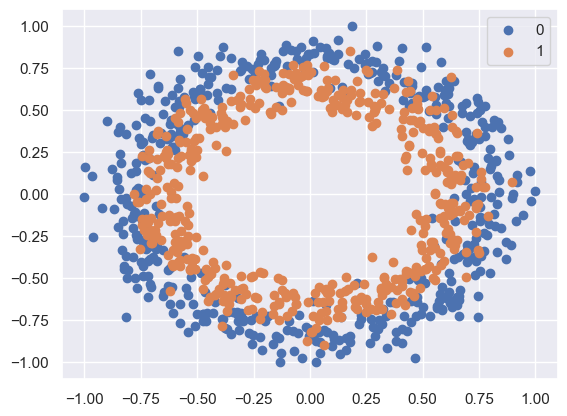

In [22]:
# gera dataset de classificação
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)

# escala input para [-1,1]
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)

# plota visualização do dataset
for i in range(2):
    samples_ix = where(y == i)
    plt.scatter(X[samples_ix, 0], X[samples_ix, 1], label=str(i))
plt.legend()
plt.show()

# separa em teste e treino
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

In [23]:
def run_model(model,log_to_tb= False ,trainX=trainX,trainy=trainy,testX=testX,testy=testy):
    """
    Função auxiliar que recebe um modelo e realiza seu treinamento e avaliação no dataset.
    """
    model.summary()

    # compila modelo
    opt = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])


    # fit modelo
    history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=500, verbose=0)

    # avalia modelo
    _, train_acc = model.evaluate(trainX, trainy, verbose=0)
    _, test_acc = model.evaluate(testX, testy, verbose=0)
    print("\n")
    print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))


    # plota acurácia/training history
    plt.ylim(0, 1)
    plt.title("Acurácia "+ model.name)
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.legend()
    plt.show()

## Rede rasa
Aqui temos uma rede rasa com apenas uma camada oculta e uma de output, note que ela é capaz de atingir uma performance razoavel após 300 epochs.

Nós estamos utilizando um inicializador diferente do padrão para os pesos da camada, que sorteia os pesos iniciais a partir de uma distribuição uniforme no intervalo [0,1].

Model: "modelo_raso"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 raso_1 (Dense)              (None, 5)                 15        
                                                                 
 raso_output (Dense)         (None, 1)                 6         
                                                                 
Total params: 21 (84.00 Byte)
Trainable params: 21 (84.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


/opt/homebrew/lib/python3.11/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(




Train: 0.804, Test: 0.798


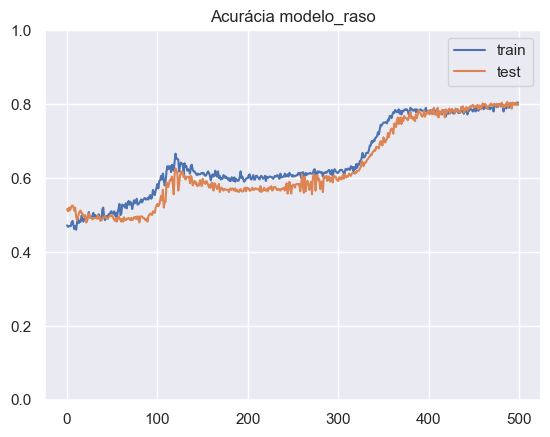

In [24]:
#define modelo raso
init = RandomUniform(minval=0, maxval=1)

model = keras.Sequential(name="modelo_raso")
model.add(keras.layers.Dense(5,
                       input_dim=2,
                       activation="tanh",
                       kernel_initializer=init,
                       name="raso_1"))
model.add(keras.layers.Dense(1,
                       activation='sigmoid',
                       kernel_initializer=init,
                       name="raso_output"))


run_model(model)

## Rede funda

Agora tornaremos nossa rede mais funda com 5 camadas ocultas e uma de output, note como a performance cai drasticamente e se torna próxima a um chute aleatório. Embora o modelo seja mais complexo e poderoso nós não conseguimos treina-lo.

Model: "modelo_fundo"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 funda_1 (Dense)             (None, 5)                 15        
                                                                 
 funda_2 (Dense)             (None, 5)                 30        
                                                                 
 funda_3 (Dense)             (None, 5)                 30        
                                                                 
 funda_4 (Dense)             (None, 5)                 30        
                                                                 
 funda_5 (Dense)             (None, 5)                 30        
                                                                 
 funda_output (Dense)        (None, 1)                 6         
                                                                 
Total params: 141 (564.00 Byte)
Trainable params: 141 



Train: 0.532, Test: 0.504


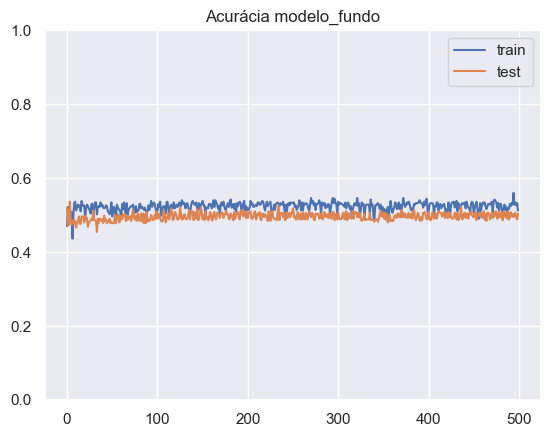

In [25]:
# define modelo mais fundo
init = RandomUniform(minval=0, maxval=1)

model = Sequential(name="modelo_fundo")
model.add(Dense(5, input_dim=2, activation='tanh', kernel_initializer=init,name="funda_1"))
model.add(Dense(5, activation='tanh', kernel_initializer=init,name="funda_2"))
model.add(Dense(5, activation='tanh', kernel_initializer=init,name="funda_3"))
model.add(Dense(5, activation='tanh', kernel_initializer=init,name="funda_4"))
model.add(Dense(5, activation='tanh', kernel_initializer=init,name="funda_5"))
model.add(Dense(1, activation='sigmoid', kernel_initializer=init,name="funda_output"))


run_model(model,log_to_tb=True)

### Utilizando inicialização de Xavier Glorot

Agora utilizaremos uma técnica de combate ao vanishing gradient, utilizaremos outro inicializador para os pesos da rede. O [inicializador de Xavier Glorot](http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf) é o inicializador default de algumas camadas do keras como a camada densa que utilizamos.

## <font color='blue'>Questão 3 </font>
Repita, na célula seguinte a rede da célula anterior, mas trocando o seu incializador pelo de Xavier Glorot uniforme, de maneira explícita. Treine o novo modelo usando a função `run model`. Faça uma análise comparativa (com o mesmo tamanho de um tweet) das curvas de obtidas para esta rede e para a rede anterior.

Model: "modelo_fundo"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 funda_1 (Dense)             (None, 5)                 15        
                                                                 
 funda_2 (Dense)             (None, 5)                 30        
                                                                 
 funda_3 (Dense)             (None, 5)                 30        
                                                                 
 funda_4 (Dense)             (None, 5)                 30        
                                                                 
 funda_5 (Dense)             (None, 5)                 30        
                                                                 
 funda_output (Dense)        (None, 1)                 6         
                                                                 
Total params: 141 (564.00 Byte)
Trainable params: 141 

/opt/homebrew/lib/python3.11/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(




Train: 0.834, Test: 0.842


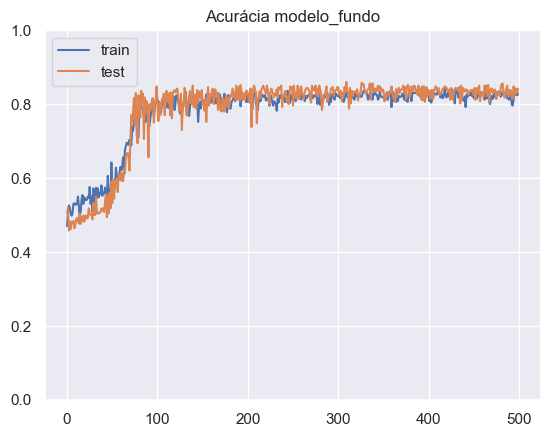

In [26]:
#Seu código aqui
init = tf.keras.initializers.GlorotUniform()

model = Sequential(name="modelo_fundo")
model.add(Dense(5, input_dim=2, activation='tanh', kernel_initializer=init,name="funda_1"))
model.add(Dense(5, activation='tanh', kernel_initializer=init,name="funda_2"))
model.add(Dense(5, activation='tanh', kernel_initializer=init,name="funda_3"))
model.add(Dense(5, activation='tanh', kernel_initializer=init,name="funda_4"))
model.add(Dense(5, activation='tanh', kernel_initializer=init,name="funda_5"))
model.add(Dense(1, activation='sigmoid', kernel_initializer=init,name="funda_output"))


run_model(model,log_to_tb=True)

## <font color='red'> Sua análise aqui </font>
Enquanto na primeira rede as curvas oscilam em uma acurácia ao redor de 0.5 sem nunca sair de um patamar abaixo de 0.6, a segunda rede rapidamente consegue uma performance boa em menos de 100 épocas, tanto na base de treino quanto na de teste.